In [ ]:
import zipfile

zip_path = "/content/archive (1).zip"
extract_path = "/content/brain_tumor"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Extracted successfully!")


 Extracted successfully!


In [ ]:
import os
os.listdir("/content/brain_tumor")


['Testing', 'Training']

In [ ]:
os.listdir("/content/brain_tumor/Training")


['glioma', 'notumor', 'pituitary', 'meningioma']

In [ ]:
import os
import cv2
import numpy as np

IMG_SIZE = 128

def load_data(folder_path):
    X = []
    y = []

    labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

    for label_index, label_name in enumerate(labels):
        category_path = os.path.join(folder_path, label_name)

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)

            # Skip non-image files
            if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            X.append(img)
            y.append(label_index)

    return np.array(X), np.array(y), labels


# Load dataset
X, y, labels = load_data("/content/brain_tumor/Training")

print("Classes:", labels)
print("Total images:", len(X))


Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Total images: 5712


In [ ]:
X = X / 255.0
X = X.reshape(-1, 128, 128, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(labels), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,260 (28.20 MB)

 Trainable params: 7,392,260 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=30, batch_size=16, validation_split=0.2)


Epoch 1/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 87s 301ms/step - accuracy: 0.6360 - loss: 0.8509 - val_accuracy: 0.6789 - val_loss: 0.8828
Epoch 2/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 93s 326ms/step - accuracy: 0.8778 - loss: 0.3240 - val_accuracy: 0.8854 - val_loss: 0.3881
Epoch 3/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 94s 328ms/step - accuracy: 0.9482 - loss: 0.1463 - val_accuracy: 0.8373 - val_loss: 0.4756
Epoch 4/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 92s 322ms/step - accuracy: 0.9732 - loss: 0.0822 - val_accuracy: 0.8679 - val_loss: 0.4309
Epoch 5/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 91s 317ms/step - accuracy: 0.9920 - loss: 0.0321 - val_accuracy: 0.8215 - val_loss: 0.6671
Epoch 6/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 138s 303ms/step - accuracy: 0.9881 - loss: 0.0398 - val_accuracy: 0.9431 - val_loss: 0.2582
Epoch 7/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 90s 313ms/step - accuracy: 0.9981 - loss: 0.0077 - val_accuracy: 0.8644 - val_loss: 0.5074
Epoch 8/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 138s 299ms/step - accuracy: 0.9941 - loss:

In [ ]:
loss, accuracy = model.evaluate(X, y)
print("Model Accuracy:", accuracy)


179/179 ━━━━━━━━━━━━━━━━━━━━ 24s 133ms/step - accuracy: 0.9976 - loss: 0.0176
Model Accuracy: 0.9793417453765869


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
🧠 Prediction: meningioma


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

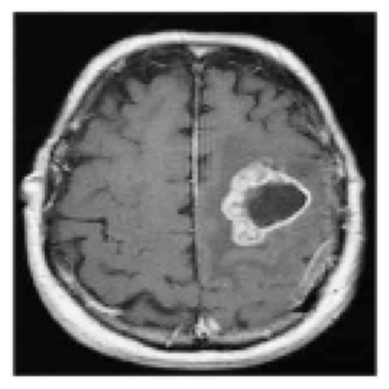

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/mri_gbm3.jpg"

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 128))
img = img / 255.0
img = img.reshape(1, 128, 128, 1)

prediction = model.predict(img)
predicted_label = labels[np.argmax(prediction)]

print("🧠 Prediction:", predicted_label)

plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')
